In [2]:
# https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/leaky-integrate-and-fire.html

%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

nr of spikes: 0


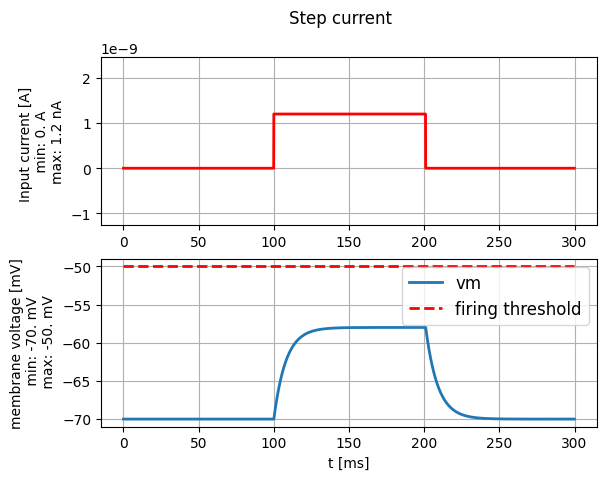

nr of spikes: 5


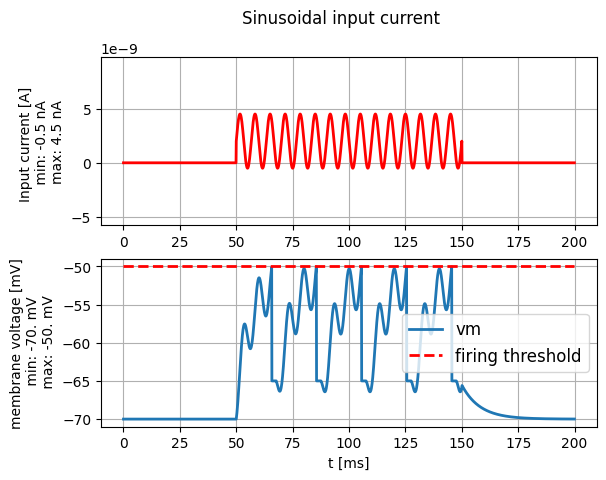

Resting potential: -70. mV
Reset voltage: -65. mV
Firing threshold: -50. mV
Membrane resistance: 10. Mohm
Membrane time-scale: 8. ms
Absolute refractory period: 2. ms


In [3]:
LIF.getting_started()
LIF.print_default_parameters()

## 1.1 Exercise: minimal current
### 1.1.1 Question: minimcal current (calculation)

In [4]:
from neurodynex3.leaky_integrate_and_fire import LIF
print("resting potential: {}".format(LIF.V_REST))
print("reset voltage: {}".format(LIF.V_RESET))
print("firing threshold: {}".format(LIF.FIRING_THRESHOLD))
print("membrane resistance: {}".format(LIF.MEMBRANE_RESISTANCE))
print("membrane time-scale: {}".format(LIF.MEMBRANE_TIME_SCALE))
print("absolute refractory period: {}".format(LIF.ABSOLUTE_REFRACTORY_PERIOD))

resting potential: -70. mV
reset voltage: -65. mV
firing threshold: -50. mV
membrane resistance: 10. Mohm
membrane time-scale: 8. ms
absolute refractory period: 2. ms


### 1.1.2. Question: minial current (simulation)

nr of spikes: 0


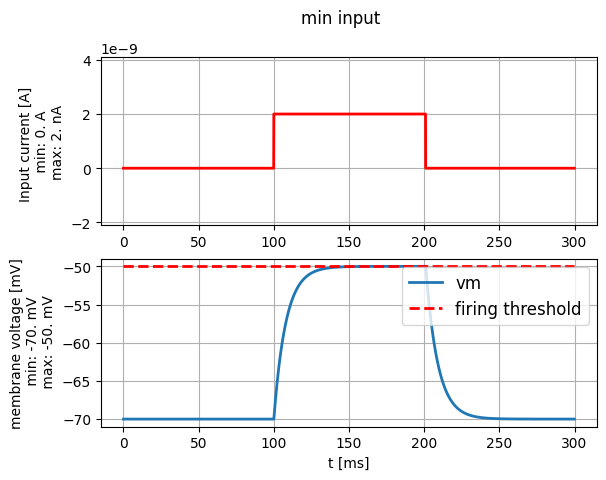

In [8]:
I_min = 2.0 * b2.namp
step_current = input_factory.get_step_current(
        t_start=100, t_end=200, unit_time=b2.ms,
        amplitude=I_min)

(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 300 * b2.ms)

plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

nr of spikes: 1


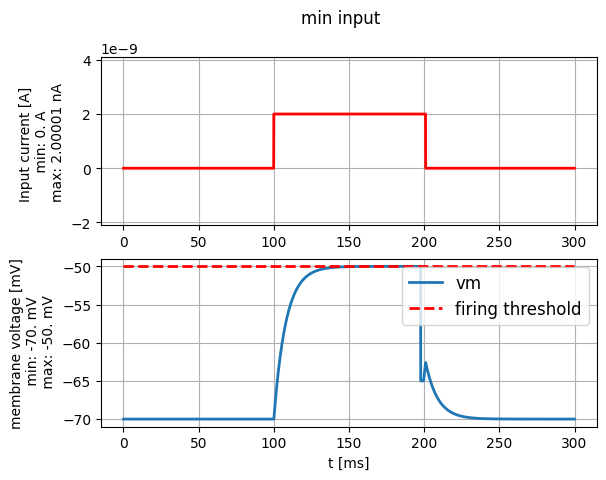

In [12]:
I_min = 2.00001 * b2.namp
step_current = input_factory.get_step_current(
        t_start=100, t_end=200, unit_time=b2.ms,
        amplitude=I_min)

(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 300 * b2.ms)

plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

## 1.2. Exercise: f-I curve
### 1.2.1. Question: f-I curve and refractoyness
* pass
## 1.3. Exercise: "Experimentally" estimate the parameters of a LIF neuron
### 1.3.1. Question: "Read" the LIF parameters out of the vm plot
1. Get a random parameter set.
2. Create an input current of your choice.
3. Simulate the LIF neuron using the random parameters and your test-current. Note that the simulation runs for a fixed duration of 50ms.
4. Plot the membrane voltage and estimate the parameters. You do not have to write code to analyse the voltage data in the StateMonitor. Simply estimate the values from the plot. For the membrane resistance and the membrane time-scale you might have to change your current.
5. Compare your estimates with the true values.



Resting potential: -60. mV
Reset voltage: -68. mV
Firing threshold: -16. mV
Membrane resistance: 9. Mohm
Membrane time-scale: 24. ms
Absolute refractory period: 2. ms


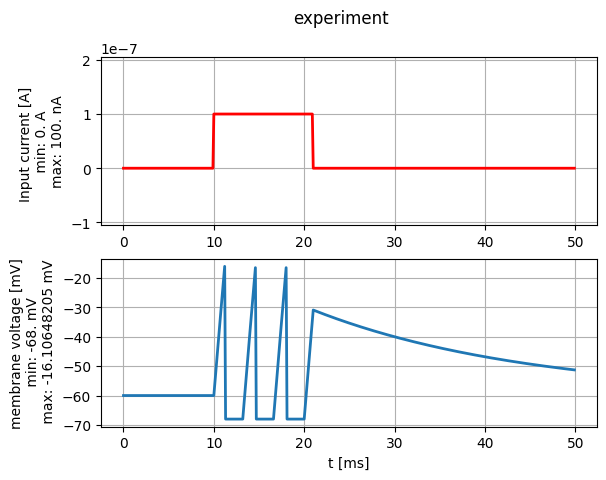

In [20]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=10, t_end=20, unit_time=b2.ms, amplitude= 100 * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

# print the parameters to the console and compare with your estimates
LIF.print_obfuscated_parameters(random_parameters)

## 1.4. Exercise: Sinusoidal input current and subthereshold response
### 1.4.1. Question
* Create a sinusoidal input current (see example below) and inject it into the LIF neuron. Determine the phase and amplitude of the membrane voltage.

nr of spikes: 0


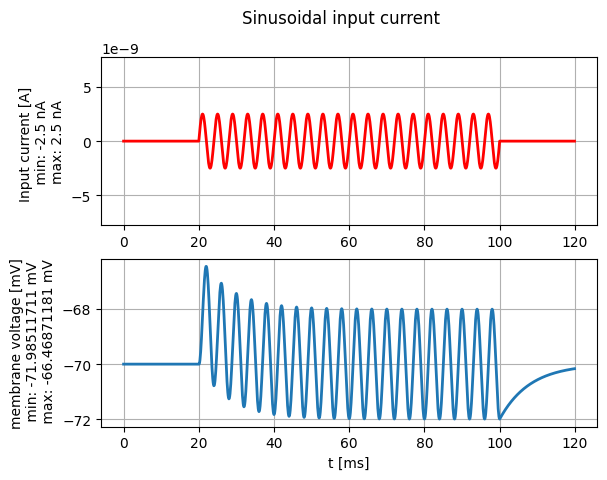

In [21]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 0


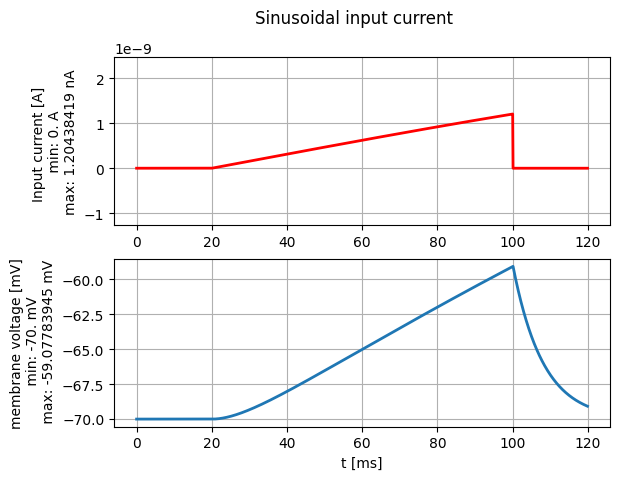

In [22]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=1*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 0


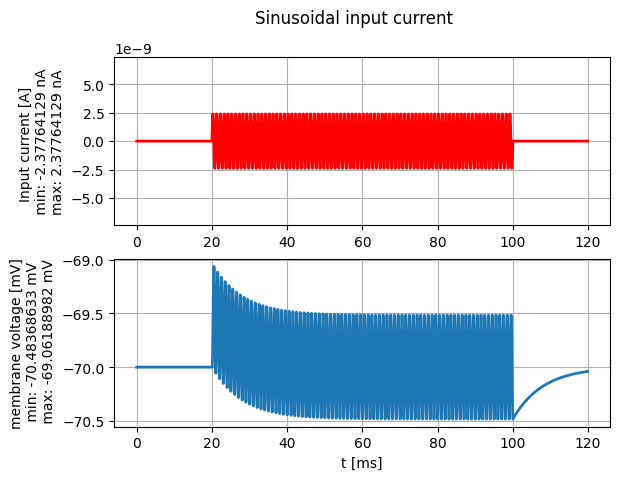

In [24]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=1000*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))